In [1]:
# Initial imports
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# Loading the sleep data
sleep_df = pd.read_csv("Sleep_Efficiency.csv")
sleep_df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,3/6/2021 1:00,3/6/2021 7:00,6.0,0.88,18,70,12,0.0,0,0,Yes,3
1,2,69,Male,12/5/2021 2:00,12/5/2021 9:00,7.0,0.66,19,28,53,3.0,0,3,Yes,3
2,3,40,Female,5/25/2021 21:30,5/25/2021 5:30,8.0,0.89,20,70,10,1.0,0,0,No,3
3,4,40,Female,11/3/2021 2:30,11/3/2021 8:30,6.0,0.51,23,25,52,3.0,50,5,Yes,1
4,5,57,Male,3/13/2021 1:00,3/13/2021 9:00,8.0,0.76,27,55,18,3.0,0,3,No,3


In [3]:
# Drop rows with missing values (blanks)
cleaned_data = sleep_df.dropna()

In [4]:
# Check the data types for each column
data_types = cleaned_data.dtypes

# Print the data types
print(data_types)

ID                          int64
Age                         int64
Gender                     object
Bedtime                    object
Wakeup time                object
Sleep duration            float64
Sleep efficiency          float64
REM sleep percentage        int64
Deep sleep percentage       int64
Light sleep percentage      int64
Awakenings                float64
Caffeine consumption        int64
Alcohol consumption         int64
Smoking status             object
Exercise frequency          int64
dtype: object


In [5]:
# Manually split "Gender" into separate "Female" and "Male" columns
cleaned_data['Female'] = (cleaned_data['Gender'] == 'Female').astype(int)
cleaned_data['Male'] = (cleaned_data['Gender'] == 'Male').astype(int)

# Drop the original "Gender" column
cleaned_data.drop('Gender', axis=1, inplace=True)

# Now, the "Gender" column has been manually split into separate "Female" and "Male" binary columns.

C:\Users\dtrob\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\dtrob\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dtrob\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [6]:
# Map "Yes" to 1 and "No" to 0 in the "Smoking status" column
cleaned_data['Smoking status'] = cleaned_data['Smoking status'].map({'Yes': 1, 'No': 0})

# Now, the "Smoking status" column has been converted to a binary column with 1s and 0s.

C:\Users\dtrob\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
cleaned_data

,ID,Age,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Female,Male
0,1,65,3/6/2021 1:00,3/6/2021 7:00,6.0,0.88,18,70,12,0.0,0,0,1,3,1,0
1,2,69,12/5/2021 2:00,12/5/2021 9:00,7.0,0.66,19,28,53,3.0,0,3,1,3,0,1
2,3,40,5/25/2021 21:30,5/25/2021 5:30,8.0,0.89,20,70,10,1.0,0,0,0,3,1,0
3,4,40,11/3/2021 2:30,11/3/2021 8:30,6.0,0.51,23,25,52,3.0,50,5,1,1,1,0
4,5,57,3/13/2021 1:00,3/13/2021 9:00,8.0,0.76,27,55,18,3.0,0,3,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,446,30,11/16/2021 23:00,11/16/2021 6:30,7.5,0.53,28,20,52,4.0,50,2,1,1,1,0
403,448,27,11/13/2021 22:00,11/13/2021 5:30,7.5,0.91,22,57,21,0.0,0,0,0,5,1,0
404,449,52,3/31/2021 21:00,3/31/2021 3:00,6.0,0.74,28,57,15,4.0,25,0,0,3,0,1
405,451,45,7/29/2021 21:00,7/29/2021 4:00,7.0,0.76,18,72,10,3.0,0,0,0,3,0,1


In [8]:
# Check the data types for each column
data_types = cleaned_data.dtypes

# Print the data types
print(data_types)

ID                          int64
Age                         int64
Bedtime                    object
Wakeup time                object
Sleep duration            float64
Sleep efficiency          float64
REM sleep percentage        int64
Deep sleep percentage       int64
Light sleep percentage      int64
Awakenings                float64
Caffeine consumption        int64
Alcohol consumption         int64
Smoking status              int64
Exercise frequency          int64
Female                      int32
Male                        int32
dtype: object


In [9]:
correlations_encoded = cleaned_data.corr()
correlations_encoded["Sleep efficiency"]

ID                        0.025931
Age                       0.124093
Sleep duration           -0.019164
Sleep efficiency          1.000000
REM sleep percentage      0.064038
Deep sleep percentage     0.789087
Light sleep percentage   -0.816934
Awakenings               -0.567885
Caffeine consumption      0.070804
Alcohol consumption      -0.397012
Smoking status           -0.292898
Exercise frequency        0.266050
Female                    0.008177
Male                     -0.008177
Name: Sleep efficiency, dtype: float64

In [10]:
# Select only numerical columns for calculating R-squared values
numerical_columns = cleaned_data.select_dtypes(include=['int32', 'int64', 'float64'])

# Create a dictionary to store R-squared values for each variable
r_squared_values = {}

# Calculate R-squared values for all variables against "REM sleep percentage"
for col in numerical_columns:
    slope, intercept, r_value, p_value, std_err = stats.linregress(cleaned_data[col], cleaned_data['Sleep efficiency'])
    r_squared = r_value ** 2
    r_squared_values[col] = r_squared

# Display the R-squared values for all variables
print("R-squared values for all variables:")
for col, r_squared in r_squared_values.items():
    print(f"{col}: {r_squared:.4f}")

R-squared values for all variables:
ID: 0.0007
Age: 0.0154
Sleep duration: 0.0004
Sleep efficiency: 1.0000
REM sleep percentage: 0.0041
Deep sleep percentage: 0.6227
Light sleep percentage: 0.6674
Awakenings: 0.3225
Caffeine consumption: 0.0050
Alcohol consumption: 0.1576
Smoking status: 0.0858
Exercise frequency: 0.0708
Female: 0.0001
Male: 0.0001


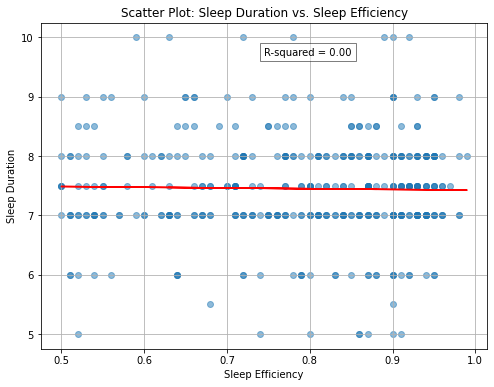

In [11]:
# Extract the data for the scatter plot
x = cleaned_data['Sleep efficiency']
y = cleaned_data['Sleep duration']

# Perform linear regression
coefficients = np.polyfit(x, y, 1)
slope, intercept = coefficients

# Calculate R-squared value
correlation_matrix = np.corrcoef(x, y)
r_squared = correlation_matrix[0, 1] ** 2

# Create a scatter plot for "Sleep duration" vs. "REM sleep percentage"
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Sleep Efficiency')
plt.ylabel('Sleep Duration')
plt.title('Scatter Plot: Sleep Duration vs. Sleep Efficiency')
plt.grid(True)

# Add the line of regression to the scatter plot
plt.plot(x, slope * x + intercept, color='red', label='Regression Line')

# Display R-squared value on the plot
plt.text(0.5, 0.9, f'R-squared = {r_squared:.2f}', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

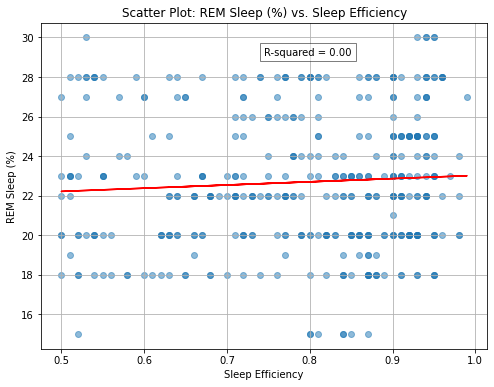

In [12]:
# Extract the data for the scatter plot
x = cleaned_data['Sleep efficiency']
y = cleaned_data['REM sleep percentage']

# Perform linear regression
coefficients = np.polyfit(x, y, 1)
slope, intercept = coefficients

# Calculate R-squared value
correlation_matrix = np.corrcoef(x, y)
r_squared = correlation_matrix[0, 1] ** 2

# Create a scatter plot for "Sleep duration" vs. "REM sleep percentage"
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Sleep Efficiency')
plt.ylabel('REM Sleep (%)')
plt.title('Scatter Plot: REM Sleep (%) vs. Sleep Efficiency')
plt.grid(True)

# Add the line of regression to the scatter plot
plt.plot(x, slope * x + intercept, color='red', label='Regression Line')

# Display R-squared value on the plot
plt.text(0.5, 0.9, f'R-squared = {r_squared:.2f}', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

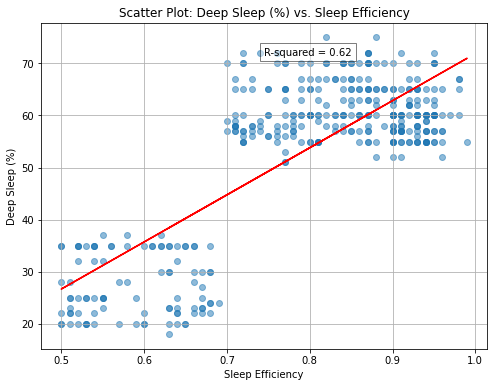

In [13]:
# Extract the data for the scatter plot
x = cleaned_data['Sleep efficiency']
y = cleaned_data['Deep sleep percentage']

# Perform linear regression
coefficients = np.polyfit(x, y, 1)
slope, intercept = coefficients

# Calculate R-squared value
correlation_matrix = np.corrcoef(x, y)
r_squared = correlation_matrix[0, 1] ** 2

# Create a scatter plot for "Sleep duration" vs. "REM sleep percentage"
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Sleep Efficiency')
plt.ylabel('Deep Sleep (%)')
plt.title('Scatter Plot: Deep Sleep (%) vs. Sleep Efficiency')
plt.grid(True)

# Add the line of regression to the scatter plot
plt.plot(x, slope * x + intercept, color='red', label='Regression Line')

# Display R-squared value on the plot
plt.text(0.5, 0.9, f'R-squared = {r_squared:.2f}', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

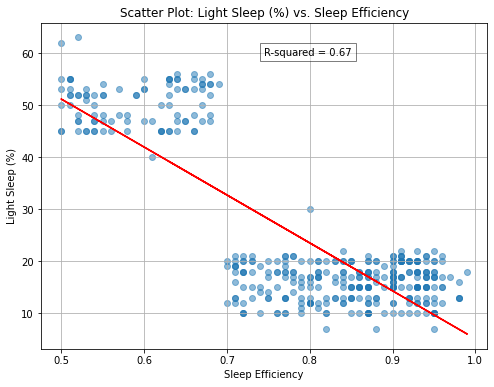

In [14]:
# Extract the data for the scatter plot
x = cleaned_data['Sleep efficiency']
y = cleaned_data['Light sleep percentage']

# Perform linear regression
coefficients = np.polyfit(x, y, 1)
slope, intercept = coefficients

# Calculate R-squared value
correlation_matrix = np.corrcoef(x, y)
r_squared = correlation_matrix[0, 1] ** 2

# Create a scatter plot for "Sleep duration" vs. "REM sleep percentage"
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Sleep Efficiency')
plt.ylabel('Light Sleep (%)')
plt.title('Scatter Plot: Light Sleep (%) vs. Sleep Efficiency')
plt.grid(True)

# Add the line of regression to the scatter plot
plt.plot(x, slope * x + intercept, color='red', label='Regression Line')

# Display R-squared value on the plot
plt.text(0.5, 0.9, f'R-squared = {r_squared:.2f}', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

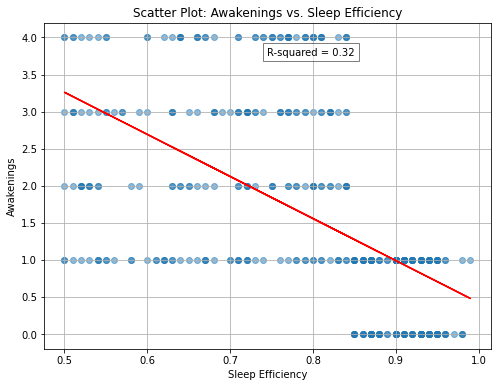

In [15]:
# Extract the data for the scatter plot
x = cleaned_data['Sleep efficiency']
y = cleaned_data['Awakenings']

# Perform linear regression
coefficients = np.polyfit(x, y, 1)
slope, intercept = coefficients

# Calculate R-squared value
correlation_matrix = np.corrcoef(x, y)
r_squared = correlation_matrix[0, 1] ** 2

# Create a scatter plot for "Sleep duration" vs. "REM sleep percentage"
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Sleep Efficiency')
plt.ylabel('Awakenings')
plt.title('Scatter Plot: Awakenings vs. Sleep Efficiency')
plt.grid(True)

# Add the line of regression to the scatter plot
plt.plot(x, slope * x + intercept, color='red', label='Regression Line')

# Display R-squared value on the plot
plt.text(0.5, 0.9, f'R-squared = {r_squared:.2f}', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

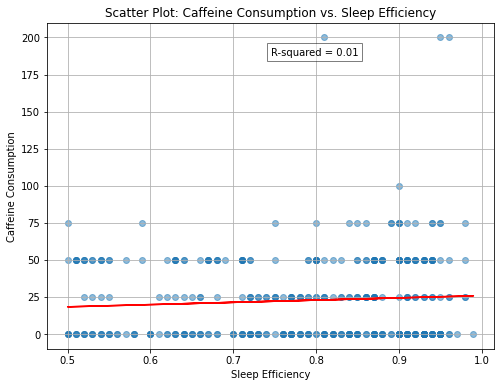

In [16]:
# Extract the data for the scatter plot
x = cleaned_data['Sleep efficiency']
y = cleaned_data['Caffeine consumption']

# Perform linear regression
coefficients = np.polyfit(x, y, 1)
slope, intercept = coefficients

# Calculate R-squared value
correlation_matrix = np.corrcoef(x, y)
r_squared = correlation_matrix[0, 1] ** 2

# Create a scatter plot for "Sleep duration" vs. "REM sleep percentage"
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Sleep Efficiency')
plt.ylabel('Caffeine Consumption')
plt.title('Scatter Plot: Caffeine Consumption vs. Sleep Efficiency')
plt.grid(True)

# Add the line of regression to the scatter plot
plt.plot(x, slope * x + intercept, color='red', label='Regression Line')

# Display R-squared value on the plot
plt.text(0.5, 0.9, f'R-squared = {r_squared:.2f}', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

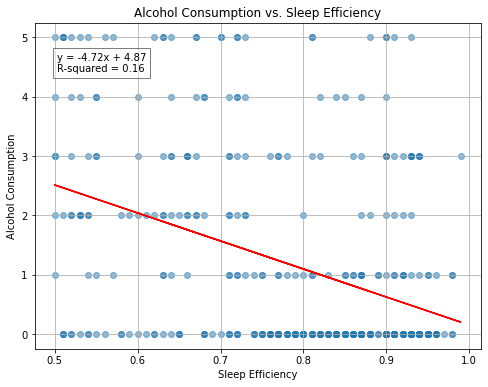

In [17]:
# Extract the data for the scatter plot
x = cleaned_data['Sleep efficiency']
y = cleaned_data['Alcohol consumption']

# Perform linear regression
coefficients = np.polyfit(x, y, 1)
slope, intercept = coefficients

# Calculate R-squared value
correlation_matrix = np.corrcoef(x, y)
r_squared = correlation_matrix[0, 1] ** 2

# Create a scatter plot for "Sleep efficiency" vs. "Alcohol consumption"
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Sleep Efficiency')
plt.ylabel('Alcohol Consumption')
plt.title('Alcohol Consumption vs. Sleep Efficiency')
plt.grid(True)

# Add the line of regression to the scatter plot
plt.plot(x, slope * x + intercept, color='red', label='Regression Line')

# Display R-squared value and equation of the regression line on the plot
equation_text = f'y = {slope:.2f}x + {intercept:.2f}\nR-squared = {r_squared:.2f}'
plt.text(0.05, 0.85, equation_text, transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

# Save the scatter plot as a PNG image
plt.savefig('alcohol_efficiency.png')

plt.show()

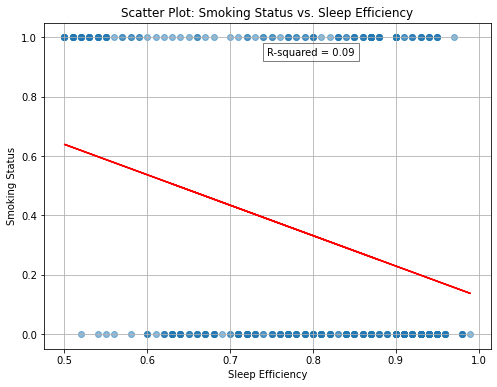

In [18]:
# Extract the data for the scatter plot
x = cleaned_data['Sleep efficiency']
y = cleaned_data['Smoking status']

# Perform linear regression
coefficients = np.polyfit(x, y, 1)
slope, intercept = coefficients

# Calculate R-squared value
correlation_matrix = np.corrcoef(x, y)
r_squared = correlation_matrix[0, 1] ** 2

# Create a scatter plot for "Sleep duration" vs. "REM sleep percentage"
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Sleep Efficiency')
plt.ylabel('Smoking Status')
plt.title('Scatter Plot: Smoking Status vs. Sleep Efficiency')
plt.grid(True)

# Add the line of regression to the scatter plot
plt.plot(x, slope * x + intercept, color='red', label='Regression Line')

# Display R-squared value on the plot
plt.text(0.5, 0.9, f'R-squared = {r_squared:.2f}', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

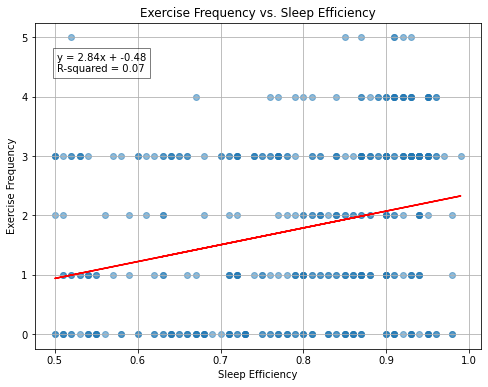

In [19]:
# Extract the data for the scatter plot
x = cleaned_data['Sleep efficiency']
y = cleaned_data['Exercise frequency']

# Perform linear regression
coefficients = np.polyfit(x, y, 1)
slope, intercept = coefficients

# Calculate R-squared value
correlation_matrix = np.corrcoef(x, y)
r_squared = correlation_matrix[0, 1] ** 2

# Create a scatter plot for "Sleep efficiency" vs. "Alcohol consumption"
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Sleep Efficiency')
plt.ylabel('Exercise Frequency')
plt.title('Exercise Frequency vs. Sleep Efficiency')
plt.grid(True)

# Add the line of regression to the scatter plot
plt.plot(x, slope * x + intercept, color='red', label='Regression Line')

# Display R-squared value and equation of the regression line on the plot
equation_text = f'y = {slope:.2f}x + {intercept:.2f}\nR-squared = {r_squared:.2f}'
plt.text(0.05, 0.85, equation_text, transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

# Save the scatter plot as a PNG image
plt.savefig('exercise_efficiency.png')

plt.show()

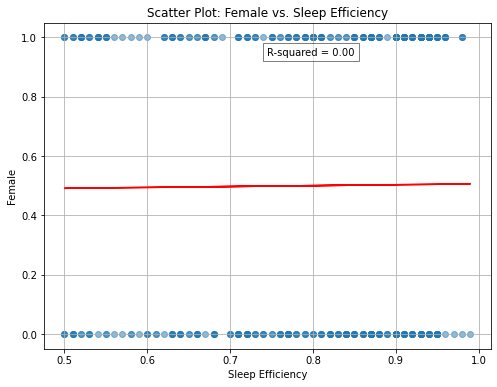

In [20]:
# Extract the data for the scatter plot
x = cleaned_data['Sleep efficiency']
y = cleaned_data['Female']

# Perform linear regression
coefficients = np.polyfit(x, y, 1)
slope, intercept = coefficients

# Calculate R-squared value
correlation_matrix = np.corrcoef(x, y)
r_squared = correlation_matrix[0, 1] ** 2

# Create a scatter plot for "Sleep duration" vs. "REM sleep percentage"
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Sleep Efficiency')
plt.ylabel('Female')
plt.title('Scatter Plot: Female vs. Sleep Efficiency')
plt.grid(True)

# Add the line of regression to the scatter plot
plt.plot(x, slope * x + intercept, color='red', label='Regression Line')

# Display R-squared value on the plot
plt.text(0.5, 0.9, f'R-squared = {r_squared:.2f}', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

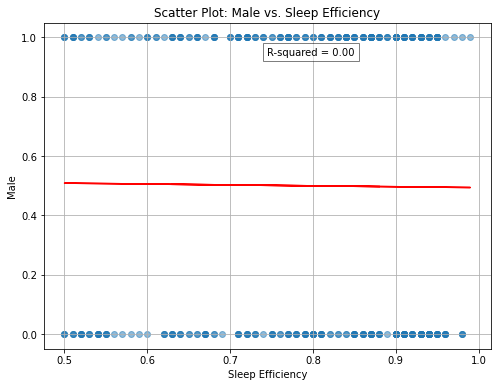

In [21]:
# Extract the data for the scatter plot
x = cleaned_data['Sleep efficiency']
y = cleaned_data['Male']

# Perform linear regression
coefficients = np.polyfit(x, y, 1)
slope, intercept = coefficients

# Calculate R-squared value
correlation_matrix = np.corrcoef(x, y)
r_squared = correlation_matrix[0, 1] ** 2

# Create a scatter plot for "Sleep duration" vs. "REM sleep percentage"
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Sleep Efficiency')
plt.ylabel('Male')
plt.title('Scatter Plot: Male vs. Sleep Efficiency')
plt.grid(True)

# Add the line of regression to the scatter plot
plt.plot(x, slope * x + intercept, color='red', label='Regression Line')

# Display R-squared value on the plot
plt.text(0.5, 0.9, f'R-squared = {r_squared:.2f}', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

plt.show()